In [1]:
import posixpath
import pandas as pd
import geopandas as gpd
import shapely
import numpy as np
from shapely.geometry import Polygon
import matplotlib.pyplot as plt
import datetime

In [2]:
data_root = "D:/OneDrive/Documents/Cours/4A/SFE/data/"

kh_fronts = gpd.read_file(posixpath.join(data_root, "KH-5_ARGON_fronts/KH-5_ARGON_fronts.shp")).to_crs(epsg=25833)
kh_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


In [3]:
landsat_fronts = gpd.read_file(posixpath.join(data_root, "Landsat_MSS_fronts/Landsat_MSS_fronts.shp")).to_crs(epsg=25833)
landsat_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446917.357 8830600.499, 446900.231..."
1,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447150.28 8832426.203, 447136.579 ..."
2,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446105.553 8836403.019, 446122.679..."
3,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00794,RGI2000-v7.0-G-07-01268,5,NE,"LINESTRING (445687.662 8843966.161, 445629.431..."
4,LM02_L1GS_245002_19760505_20200907_02_T2,Landsat 2 MSS,1976-05-05,RGI60-07.00790,RGI2000-v7.0-G-07-01266,6,NE,"LINESTRING (442212.658 8844269.303, 442116.749..."


In [4]:
all_fronts = pd.concat([kh_fronts, landsat_fronts], ignore_index=True)
all_fronts.head()

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
0,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00791,RGI2000-v7.0-G-07-01223,2,NE,"LINESTRING (446989.216 8830958.43, 446941.212 ..."
1,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00777,RGI2000-v7.0-G-07-01225,3,E,"LINESTRING (447461.671 8832029.666, 447497.042..."
2,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00775,RGI2000-v7.0-G-07-01229,4,SE,"LINESTRING (446131.469 8835920.477, 446232.529..."
3,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00709,RGI2000-v7.0-G-07-00011,25,W,"LINESTRING (416080.008 8819152.093, 416146.96 ..."
4,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00664,RGI2000-v7.0-G-07-00015,26,W,"LINESTRING (415736.404 8813938.659, 415733.877..."


## Comparison of KH fronts retrieved from a same series

In [5]:
# selecting a specific series of images, and a specific glaciers with a front on each image.
glacier = kh_fronts.loc[kh_fronts.timestamp == "1963-08-29"].loc[kh_fronts.RGI70ID == "RGI2000-v7.0-G-07-01166"]
glacier

,image,mission,timestamp,RGI60ID,RGI70ID,front_id,front_dir,geometry
49,DS09058A024MC012,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634297.177 8760360.346, 634490.454..."
111,DS09058A024MC013,KH-5 ARGON 9058A,1963-08-29,RGI60-07.00896,RGI2000-v7.0-G-07-01166,114,N,"LINESTRING (634151.483 8760173.19, 634279.328 ..."


### Resample with constant distance (not sure it is useful)

In [6]:
# from utils import geometry

# def min_distance(line):
#     coords = np.array(line.coords)
#     lengths = np.array([shapely.LineString([coords[i, :], coords[i+1, :]]).length for i in range(coords.shape[0] - 1)])
#     return lengths.min(), lengths.argmin()

# # d, i = min_distance(line)
# # reshaped_line = geometry.redistribute_vertices(line, d)
# # reshaped_line

# glacier.loc[:, "min_distance"] = glacier.geometry.apply(lambda x: min_distance(x)[0])
# glacier

In [7]:
# d = glacier.min_distance.min()
# glacier.loc[:, "geometry"] = glacier.geometry.apply(lambda x: geometry.redistribute_vertices(x, d))
# glacier

### Evaluate distances

In [8]:
# def distance(front1, front2):
#     '''
#     Calculates the distance between two fronts, by dividing the area of the polygon by the mean length.
#     If the front lengths are too different (50%), return None.
#     '''
#     if (front1.length > 1.5*front2.length) or (front2.length > 1.5*front1.length):
#         return None
#     else:
#         polygon = Polygon(list(front1.coords) + list(front2.coords)[::-1])
#         return polygon.area/((front1.length + front2.length)/2 )
    
# line1 = glacier.geometry.iloc[0]
# line2 = glacier.geometry.iloc[1]

# distance(line1, line2)

## Systematic comparison

In [9]:
# timestamps = kh_fronts.timestamp.unique()
# di = 0
# g = ""
# d = ""
# for i in range(len(timestamps)):
#     kh_fronts_date = kh_fronts.loc[kh_fronts.timestamp == timestamps[i]]

#     glaciers = kh_fronts_date.RGI70ID.unique()
#     for j in range(len(glaciers)):
#         kh_fronts_date_glacier = kh_fronts_date.loc[kh_fronts_date.RGI70ID == glaciers[j]]
        
#         for k in range(len(kh_fronts_date_glacier.geometry) - 1):
#             for l in range(k + 1, len(kh_fronts_date_glacier.geometry)):
#                 front1 = kh_fronts_date_glacier.geometry.iloc[k]
#                 front2 = kh_fronts_date_glacier.geometry.iloc[l]
#                 dist = distance(front1, front2)
#                 if dist is not None:
#                     if dist > di:
#                         di = dist
#                         g = glaciers[j]
#                         d = timestamps[i]
# di, g, d

## First Observations

In [10]:
print(len(all_fronts.RGI70ID.value_counts()), "glaciers observed")
print(len(all_fronts.front_id.value_counts()), "fronts observed")

171 glaciers observed
180 fronts observed


## Accuracy 

### KH

In [11]:
all_fronts.front_id.values.max()

180

In [12]:
fronts = all_fronts.loc[all_fronts.front_id == 122]
fronts_1962 = fronts.loc[fronts.timestamp.apply(lambda x:x.year) == 1962]
fronts_1976 = fronts.loc[fronts.timestamp.apply(lambda x:x.year) == 1976]
c_1962 = np.array([shapely.centroid(fronts_1962.iloc[0].geometry).x, shapely.centroid(fronts_1962.iloc[0].geometry).y])
c_1976 = np.array([shapely.centroid(fronts_1962.iloc[0].geometry).x, shapely.centroid(fronts_1976.iloc[0].geometry).y])

sgn = np.sign(np.dot(c_1976 - c_1962, np.array([0, 1])))
sgn

1.0

Timestamp: 1962-05-16 00:00:00, Mean distance: 27.57 m, Standard deviation: 664.59 m
Timestamp: 1963-08-29 00:00:00, Mean distance: 6.46 m, Standard deviation: 247.59 m
Skipped 61 comparisons out of 540 due to length difference.


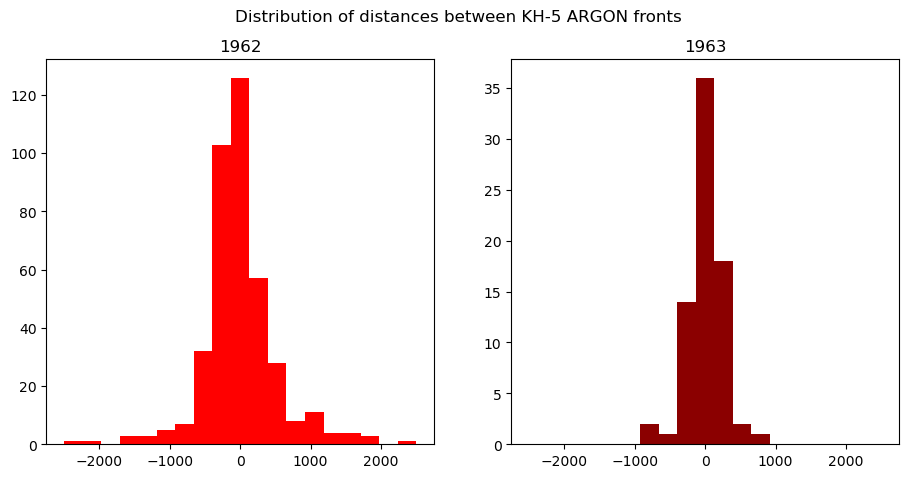

In [23]:
def distance_abs(front1, front2):
    '''
    Calculates the absolute distance between two fronts, by dividing the area of the polygon by the mean length.
    If the front lengths are too different (50%), return None.
    '''
    if (front1.length > 1.5*front2.length) or (front2.length > 1.5*front1.length):
        return None
    else:
        polygon = Polygon(list(front1.coords) + list(front2.coords)[::-1])
        return polygon.area/((front1.length + front2.length)/2 )
    
def distance(front1, front2, dir_1, dir_2):
    '''
    Calculates the signed distance between two fronts, using flow direction.
    '''
    assert dir_1 == dir_2, "Fronts must have the same direction" # maybe transform into return None?
    dist_abs = distance_abs(front1, front2)
    if dist_abs is not None:
        # transform direction into av vector:
        if dir_1 == "N":
            dir_vector = np.array([0, 1])
        elif dir_1 == "S":
            dir_vector = np.array([0, -1])
        elif dir_1 == "E":
            dir_vector = np.array([1, 0])
        elif dir_1 == "W":
            dir_vector = np.array([-1, 0])
        elif dir_1 == "NE":
            dir_vector = np.array([1, 1]) / np.sqrt(2)
        elif dir_1 == "NW":
            dir_vector = np.array([-1, 1]) / np.sqrt(2)
        elif dir_1 == "SE":
            dir_vector = np.array([1, -1]) / np.sqrt(2)
        elif dir_1 == "SW":
            dir_vector = np.array([-1, -1]) / np.sqrt(2)
        else:
            raise ValueError(f"Unknown direction: {dir_1}")
        
        # centroids:
        c_1 = np.array([shapely.centroid(front1).x, shapely.centroid(front1).y])
        c_2 = np.array([shapely.centroid(front2).x, shapely.centroid(front2).y])
        
        # sign
        sgn = np.sign(np.dot(c_2 - c_1, dir_vector))
        
        return dist_abs * sgn
    else: 
        return None
        

dists = []
skip_count = 0
total_count = 0
timestamps = [datetime.datetime(1962, 5, 16), datetime.datetime(1963, 8, 29)]
for timestamp in timestamps:
    dists_timestamp = []
    front_ids = kh_fronts.loc[kh_fronts.timestamp == timestamp].front_id.unique()
    for i_front_id, front_id in enumerate(front_ids):
        fronts = kh_fronts.loc[kh_fronts.front_id == front_id].loc[kh_fronts.timestamp == timestamp]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # print(front_id) # to identify the fronts that have different flow directions.
                dist = distance(front1, front2, dir_1, dir_2)
                if dist is not None:
                    dists_timestamp.append(dist)
                else:
                    skip_count += 1
                total_count += 1
    dists.append(dists_timestamp)
        
dists_npy = [np.array(dists_timestamp) for dists_timestamp in dists]
sigma = [dists_npy_timestamp.std() for dists_npy_timestamp in dists_npy]
mean = [dists_npy_timestamp.mean() for dists_npy_timestamp in dists_npy]

for i in range(len(timestamps)):
    print(f"Timestamp: {timestamps[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma[i]:.2f} m")

print(f"Skipped {skip_count} comparisons out of {total_count} due to length difference.")
fig, axs = plt.subplots(ncols=len(timestamps), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-2500, 2500, 20), color="red")
axs[0].set_title(timestamps[0].strftime("%Y"))
axs[1].hist(dists[1], bins=np.linspace(-2500, 2500, 20), color="darkred")
axs[1].set_title(timestamps[1].strftime("%Y"))
fig.suptitle("Distribution of distances between KH-5 ARGON fronts")
fig.savefig("images/KH-5_ARGON_fonts_accuracy.png", bbox_inches="tight")

### Landsat

Year: 1976, Mean distance: -3.19 m, Standard deviation: 125.33 m
Year: 1978, Mean distance: 23.66 m, Standard deviation: 122.23 m
Skipped 59 comparisons out of 337 due to length difference


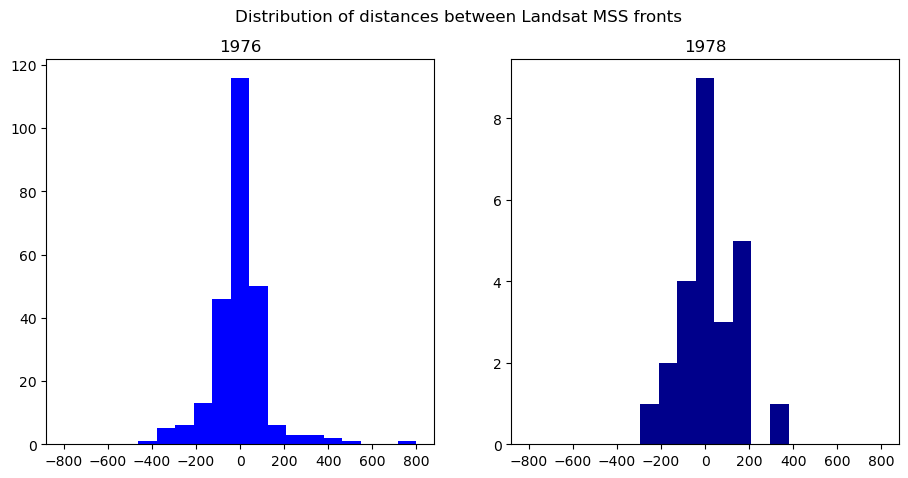

In [24]:
def get_year(timestamp):
    return timestamp.year

dists = []
skip_count = 0
total_count = 0
years = [1976, 1978]
for year in years:
    dists_year = []
    front_ids = landsat_fronts.loc[landsat_fronts.timestamp.apply(get_year) == year].front_id.unique()
    for front_id in front_ids:
        fronts = landsat_fronts.loc[landsat_fronts.front_id == front_id].loc[landsat_fronts.timestamp.apply(get_year) == year]
        for k in range(len(fronts.geometry) - 1):
            for l in range(k + 1, len(fronts.geometry)):
                front1 = fronts.geometry.iloc[k]
                front2 = fronts.geometry.iloc[l]
                dir_1 = fronts.front_dir.iloc[k]
                dir_2 = fronts.front_dir.iloc[l]
                # print(front_id) # to identify the fronts that have different flow directions.
                dist = distance(front1, front2, dir_1, dir_2)
                if dist is not None:
                    dists_year.append(dist)
                else:
                    skip_count += 1
                total_count += 1
    dists.append(dists_year)
        
dists_npy = [np.array(dists_year) for dists_year in dists]
sigma = [dists_npy_year.std() for dists_npy_year in dists_npy]
mean = [dists_npy_year.mean() for dists_npy_year in dists_npy]

for i in range(len(years)):
    print(f"Year: {years[i]}, Mean distance: {mean[i]:.2f} m, Standard deviation: {sigma[i]:.2f} m")

print(f"Skipped {skip_count} comparisons out of {total_count} due to length difference")

fig, axs = plt.subplots(ncols=len(years), figsize=(11, 5))
axs[0].hist(dists[0], bins=np.linspace(-800, 800, 20), color="blue")
axs[0].set_title(years[0])
axs[1].hist(dists[1], bins=np.linspace(-800, 800, 20), color="darkblue")
axs[1].set_title(years[1])
fig.suptitle("Distribution of distances between Landsat MSS fronts")
fig.savefig("images/Landsat_MSS_fonts_accuracy.png", bbox_inches="tight")

In [18]:
years = np.array([1962, 1963, 1976, 1978])
sigmas_prime = np.array([665, 248, 125, 122])
sigmas = sigmas_prime / np.sqrt(2)
sigmas

array([470.22600949, 175.36248173,  88.38834765,  86.2670273 ])

In [97]:
uncertainties = pd.DataFrame(
    [],
    columns=["year_1", "year_2", "sigma_dist", "2_sigma_dist", "3_sigma_dist"]
)

for i in range(len(years) - 1):
    for j in range(i + 1, len(years)):
        uncertainties.loc[len(uncertainties)] = [
            years[i],
            years[j],
            np.sqrt(sigmas[i]**2 + sigmas[j]**2),
            2 * np.sqrt(sigmas[i]**2 + sigmas[j]**2),
            3 * np.sqrt(sigmas[i]**2 + sigmas[j]**2)
        ]
        
uncertainties.loc[:, "years"] = uncertainties.loc[:, ["year_1", "year_2"]].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1)
uncertainties = uncertainties[["year_1", "year_2", "years", "sigma_dist", "2_sigma_dist", "3_sigma_dist"]]
uncertainties

,year_1,year_2,years,sigma_dist,2_sigma_dist,3_sigma_dist
0,1962.0,1963.0,"(1962.0, 1963.0)",501.861037,1003.722073,1505.583110
1,1962.0,1976.0,"(1962.0, 1976.0)",478.461075,956.922149,1435.383224
2,1962.0,1978.0,"(1962.0, 1978.0)",478.073739,956.147478,1434.221217
3,1963.0,1976.0,"(1963.0, 1976.0)",196.378461,392.756922,589.135383
4,1963.0,1978.0,"(1963.0, 1978.0)",195.432853,390.865706,586.298559
5,1976.0,1978.0,"(1976.0, 1978.0)",123.509109,247.018218,370.527327


## Retreat / Advance between KH / Landsat

In [98]:
results = pd.DataFrame(
    [],
    columns = ["front_id", "year_1", "year_2", "distance"]
)
# skip_count = 0
# total_count = 0
years = [1962, 1963, 1976, 1978]

for front in all_fronts.front_id.unique():
    # compare observations from any year to fronts from any other year, for a specific front.
    for i_year in range(len(years) - 1):
        year = years[i_year]
        fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == year]
        for i_other_year in range(i_year + 1, len(years)):
            other_year = years[i_other_year]
            other_fronts = all_fronts.loc[all_fronts.front_id == front].loc[all_fronts.timestamp.apply(get_year) == other_year]
            
            dists = []
            # compare all the observations between them
            for k in range(len(fronts.geometry)):
                for l in range(len(other_fronts.geometry)):
                    front1 = fronts.geometry.iloc[k]
                    front2 = other_fronts.geometry.iloc[l]
                    dir_1 = fronts.front_dir.iloc[k]
                    dir_2 = other_fronts.front_dir.iloc[l]
                    # print(front) # to identify the fronts that have different flow directions.
                    dist = distance(front1, front2, dir_1, dir_2)
                    if dist is not None: # recall: distance returns None if the lengths of the fronts are too different
                        dists.append(dist)
                    else:
                        skip_count += 1
                    total_count += 1
            
            if not dists == []:
                # horrible hack to load an array as a value in a DataFrame
                results_i = pd.DataFrame(
                    [[front, year, other_year, np.array(dists)]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )      
            else: # load None instead of a list of distances
                results_i = pd.DataFrame(
                    [[front, year, other_year, None]],
                    columns=["front_id", "year_1", "year_2", "distance"]
                )
            results = pd.concat([results, results_i])
results.reset_index(drop=True, inplace=True)
results = results.dropna().reset_index(drop=True)
results

,front_id,year_1,year_2,distance
0,2,1962,1963,"[-79.48402579080955, -603.780206891322, -5.887..."
1,2,1962,1976,"[-400.01519757875695, -461.60260977397235, -44..."
2,2,1962,1978,"[-564.3538386904038, -1109.0978650814443]"
3,2,1963,1976,"[-300.9716348393031, -392.455685340897, -386.9..."
4,2,1963,1978,[-505.13812309827387]
...,...,...,...,...
436,87,1976,1978,[-91.97451945462406]
437,82,1976,1978,[153.44472935472436]
438,66,1976,1978,[-72.56704667293884]
439,72,1976,1978,[-33.72669053388882]


Trying to identify a distribution pattern to compare observations from different years:

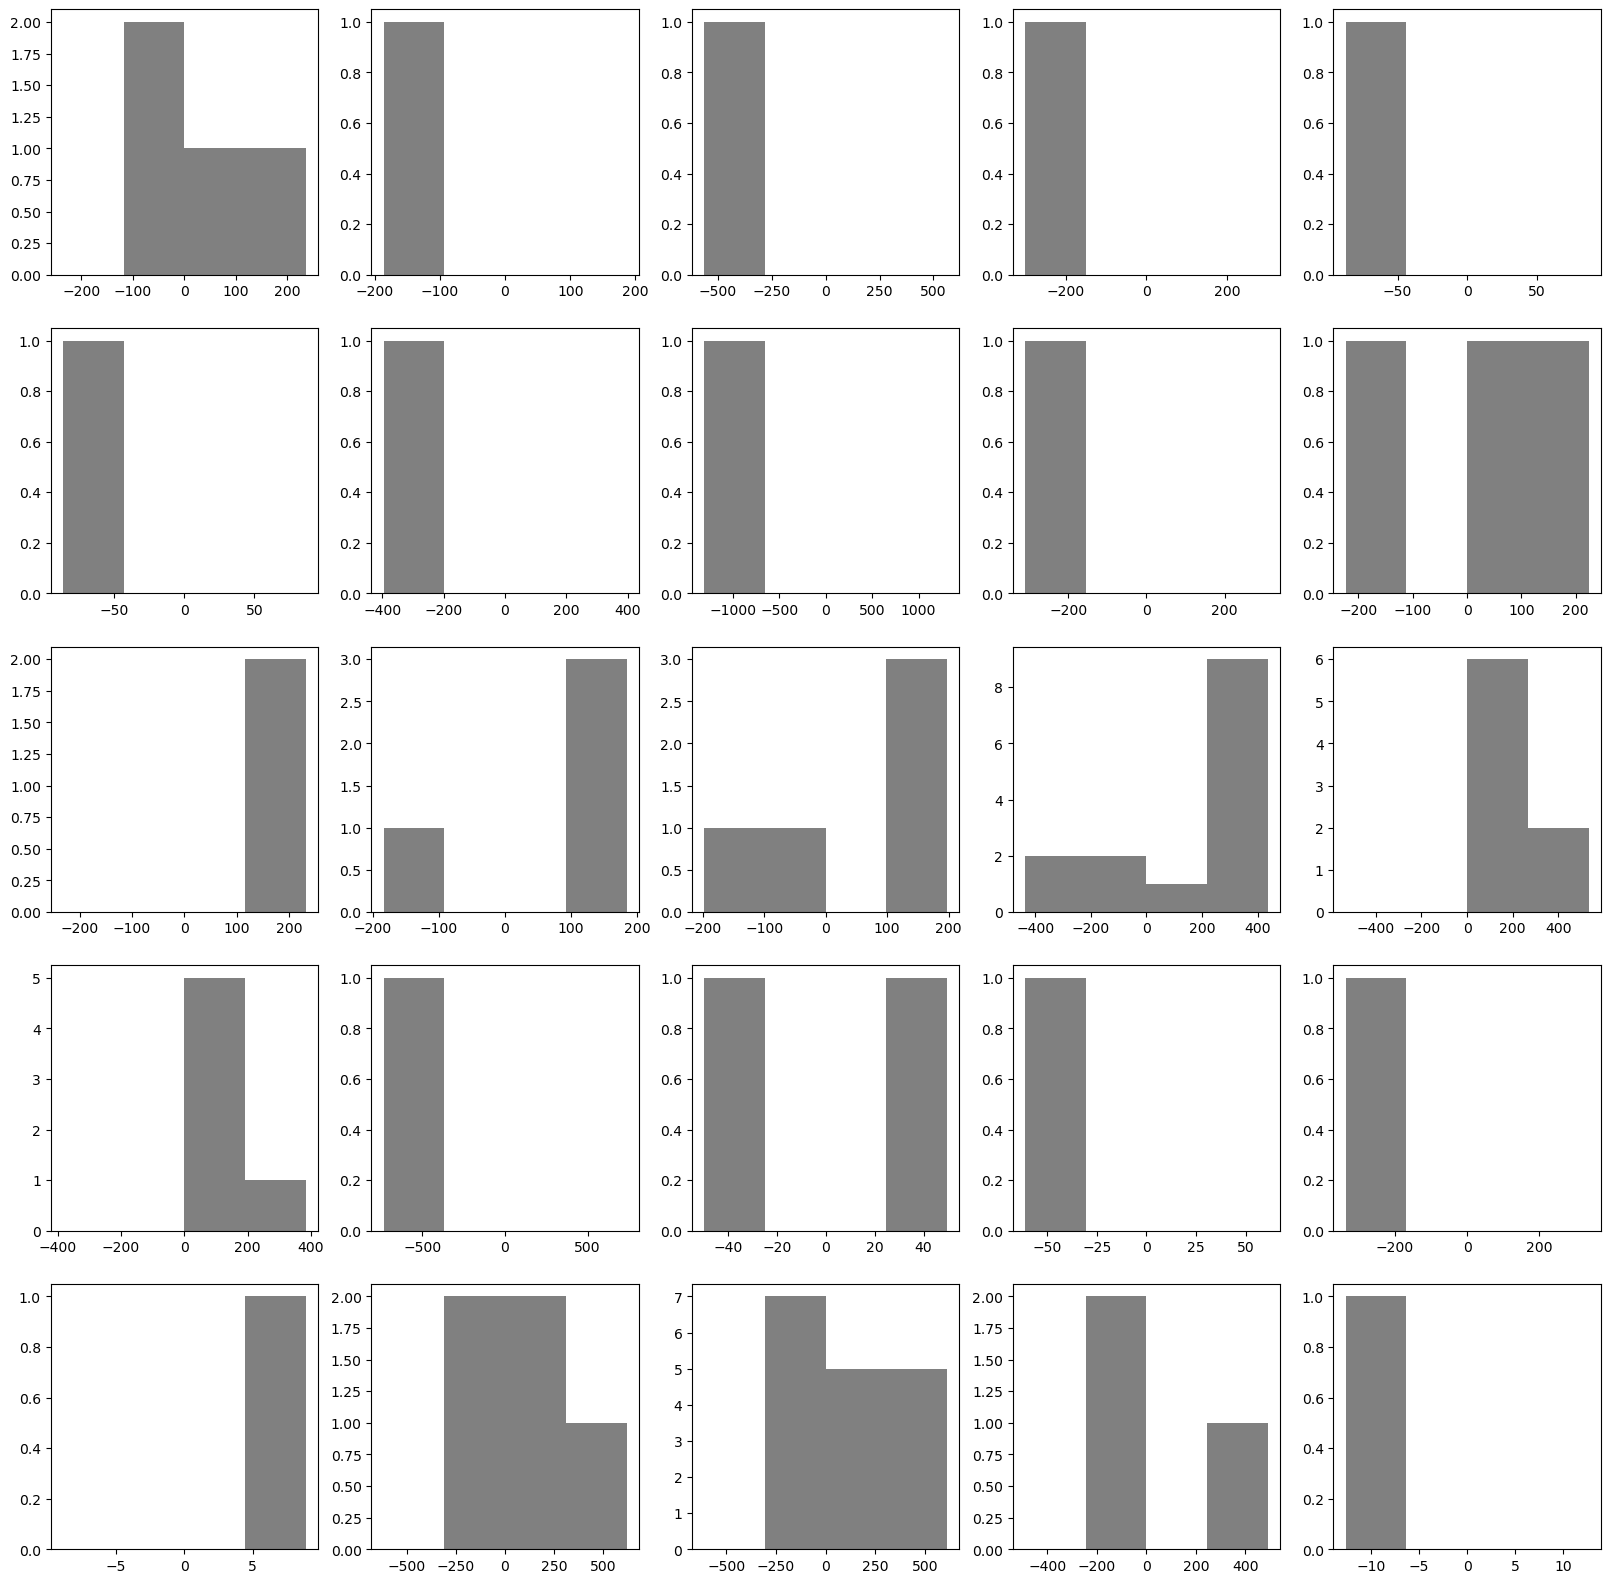

In [99]:
fig, axs = plt.subplots(ncols=5, nrows=5, figsize=[20, 20])
c = 0
for i in range(len(results)):
    if len(results.distance[i]) > 1:
        if c < 25:
            axs[c//5, c%5].hist(results.distance[i], bins=np.linspace(-np.abs(results.distance[i].max()), np.abs(results.distance[i].max()), 5), color="gray")
        c += 1

**Conclusion :** No pattern identified → each distances distribution is approximated by its mean value and associated to the corresponding uncertainty.

In [100]:
results.loc[:, "mean_distance"] = results.distance.apply(lambda x: np.array(x).mean())
results.loc[:, "uncertainty"] = results.loc[:, ["year_1", "year_2"]].apply(lambda x: uncertainties.loc[(uncertainties.year_1 == x.iloc[0]) & (uncertainties.year_2 == x.iloc[1]), "2_sigma_dist"].values[0], axis=1)

# not necessary but easier to control results : put the years in a single column. 
results.loc[:, "years"] = results.loc[:, ["year_1", "year_2"]].apply(lambda x: (x.iloc[0], x.iloc[1]), axis=1)
results = results[["front_id", "year_1", "year_2", "years", "mean_distance", "uncertainty"]]

results

,front_id,year_1,year_2,years,mean_distance,uncertainty
0,2,1962,1963,"(1962, 1963)",-77.791416,1003.722073
1,2,1962,1976,"(1962, 1976)",-645.983663,956.922149
2,2,1962,1978,"(1962, 1978)",-836.725852,956.147478
3,2,1963,1976,"(1963, 1976)",-369.829291,392.756922
4,2,1963,1978,"(1963, 1978)",-505.138123,390.865706
...,...,...,...,...,...,...
436,87,1976,1978,"(1976, 1978)",-91.974519,247.018218
437,82,1976,1978,"(1976, 1978)",153.444729,247.018218
438,66,1976,1978,"(1976, 1978)",-72.567047,247.018218
439,72,1976,1978,"(1976, 1978)",-33.726691,247.018218


In [101]:
# horrible way to plot a summary of the results, but I could not find better.
results_overview = pd.DataFrame(
    [],
    columns=["years", "uncertainty", "count"]
)
results_overview.loc[:, "years"] = results.years.unique()
results_overview.loc[:, "uncertainty"] = results.uncertainty.unique()
results_overview.loc[:, "count"] = results.years.value_counts().values
results_overview

,years,uncertainty,count
0,"(1962, 1963)",1003.722073,101
1,"(1962, 1976)",956.922149,94
2,"(1962, 1978)",956.147478,70
3,"(1963, 1976)",392.756922,65
4,"(1963, 1978)",390.865706,61
5,"(1976, 1978)",247.018218,50


Text(0.5, 1.0, '1976-1978')

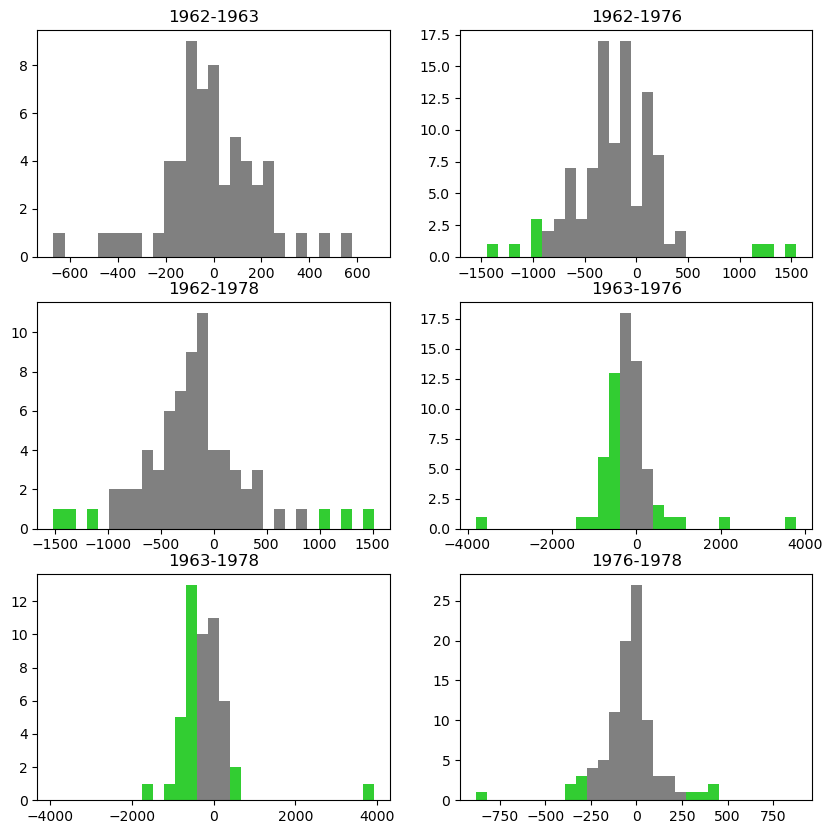

In [139]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(10, 10))

valid_color = "limegreen"
nbins = 30

years = (1962, 1963)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[0, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2  # shift bins to the center
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[0, 0].set_title(f"{years[0]}-{years[1]}")
        
years = (1962, 1976)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[0, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[0, 1].set_title(f"{years[0]}-{years[1]}")
        
years = (1962, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[1, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[1, 0].set_title(f"{years[0]}-{years[1]}")
        
years = (1963, 1976)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[1, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[1, 1].set_title(f"{years[0]}-{years[1]}")
        
years = (1963, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[2, 0].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[2, 0].set_title(f"{years[0]}-{years[1]}")
        
years = (1976, 1978)
d = results.loc[results.years == years].mean_distance
N, bins, patches = axs[2, 1].hist(d, color="gray", bins=np.linspace(-np.abs(d).max(), np.abs(d).max(), nbins))
uncertainty = uncertainties.loc[uncertainties.years == years]["2_sigma_dist"].values[0]
bins = np.array(bins) + (bins[1] - bins[0])/2
for i in range(len(patches)):
    if np.abs(bins[i]) >= uncertainty:
        patches[i].set_facecolor(valid_color)
axs[2, 1].set_title(f"{years[0]}-{years[1]}")

Selection of observations that show a displacement between the 1960's and 1970's:

In [93]:
important_results = results.loc[(results.year_1 == 1962) | (results.year_1 == 1963)].loc[(results.year_2 == 1976) | (results.year_2 == 1978)]
important_results

,front_id,year_1,year_2,years,mean_distance,uncertainty
1,2,1962,1976,"(1962, 1976)",-645.983663,956.922149
2,2,1962,1978,"(1962, 1978)",-836.725852,956.147478
3,2,1963,1976,"(1963, 1976)",-369.829291,392.756922
4,2,1963,1978,"(1963, 1978)",-505.138123,390.865706
6,3,1963,1976,"(1963, 1976)",-325.018500,392.756922
...,...,...,...,...,...,...
424,106,1963,1976,"(1963, 1976)",-444.537016,392.756922
426,109,1962,1976,"(1962, 1976)",-921.136488,956.922149
427,109,1962,1978,"(1962, 1978)",-1147.300764,956.147478
428,109,1963,1976,"(1963, 1976)",-802.792350,392.756922


In [94]:
important_results_overview = pd.DataFrame(
    [],
    columns=["years", "uncertainty", "count"]
)
important_results_overview.loc[:, "years"] = important_results.years.unique()
important_results_overview.loc[:, "uncertainty"] = important_results.uncertainty.unique()
important_results_overview.loc[:, "count"] = important_results.years.value_counts().values
important_results_overview

,years,uncertainty,count
0,"(1962, 1976)",956.922149,101
1,"(1962, 1978)",956.147478,70
2,"(1963, 1976)",392.756922,65
3,"(1963, 1978)",390.865706,50
